In [710]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,auc,roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [711]:
import warnings
warnings.filterwarnings('ignore')

In [712]:
covid = pd.read_csv('corona_tested_individuals_ver_006.english.csv',low_memory=False)
covid.head()

test_date cough fever sore_throat shortness_of_breath head_ache  \
0  2020-04-30     0     0           0                   0         0   
1  2020-04-30     1     0           0                   0         0   
2  2020-04-30     0     1           0                   0         0   
3  2020-04-30     1     0           0                   0         0   
4  2020-04-30     1     0           0                   0         0   

  corona_result age_60_and_above  gender test_indication  
0      negative             None  female           Other  
1      negative             None  female           Other  
2      negative             None    male           Other  
3      negative             None  female           Other  
4      negative             None    male           Other

In [713]:
covid.shape

(278848, 10)

In [714]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   test_date            278848 non-null  object
 1   cough                278848 non-null  object
 2   fever                278848 non-null  object
 3   sore_throat          278848 non-null  object
 4   shortness_of_breath  278848 non-null  object
 5   head_ache            278848 non-null  object
 6   corona_result        278848 non-null  object
 7   age_60_and_above     278848 non-null  object
 8   gender               278848 non-null  object
 9   test_indication      278848 non-null  object
dtypes: object(10)
memory usage: 21.3+ MB


In [715]:
covid.isnull().sum()

test_date              0
cough                  0
fever                  0
sore_throat            0
shortness_of_breath    0
head_ache              0
corona_result          0
age_60_and_above       0
gender                 0
test_indication        0
dtype: int64

In [716]:
covid.duplicated().sum()

272207

- As we can see above, a majority of the records appear as duplicates.
- But we have to keep in mind that these records all represent individual patients.
- Therefore,we shall not drop any records.

#### corona_result

In [717]:
covid.corona_result.value_counts()

negative    260227
positive     14729
other         3892
Name: corona_result, dtype: int64

In [718]:
covid.drop(covid.index[covid.corona_result=='other'],inplace=True)
covid.corona_result.value_counts()

negative    260227
positive     14729
Name: corona_result, dtype: int64

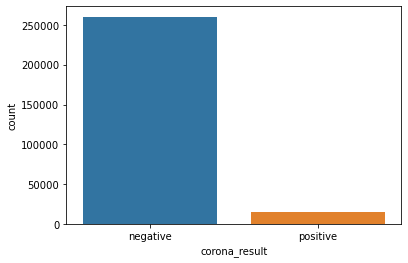

In [719]:
sns.countplot(covid.corona_result)
plt.show()

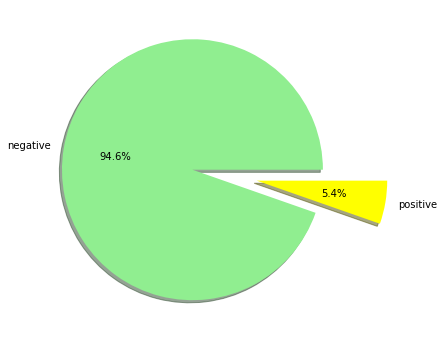

In [720]:
a=covid.corona_result.value_counts()
keys=a.keys().to_list()
count=a.to_list()
plt.figure(figsize=(15,6))
plt.pie(count,labels=keys,autopct='%1.1f%%',shadow=True,explode=[0,0.5],colors=['lightgreen','yellow'])
plt.show()

##### test_date

In [721]:
covid.test_date=pd.to_datetime(covid.test_date)

In [722]:
covid.test_date.nunique()

51

In [723]:
covid['month']=covid.test_date.dt.month_name()
covid['day']=covid.test_date.dt.day

In [724]:
covid['day']=covid['day'].astype('int64')

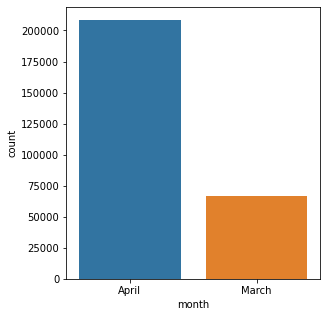

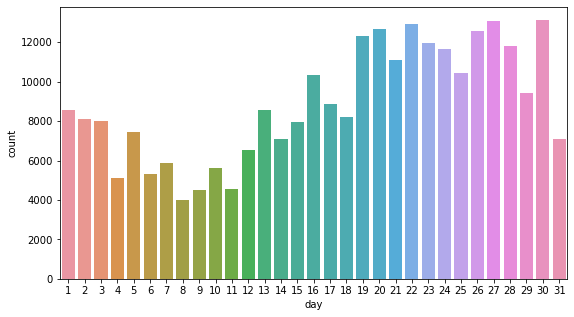

In [725]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(covid.month)
plt.show()

plt.figure(figsize=(20,5))
plt.subplot(1,2,2)
sns.countplot(covid.day)
plt.show()

In [726]:
pd.crosstab(covid.corona_result,covid.month)

month           April  March
corona_result               
negative       199596  60631
positive         8881   5848

<AxesSubplot:xlabel='corona_result'>

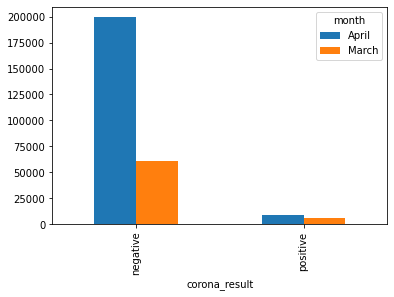

In [727]:
pd.crosstab(covid.corona_result,covid.month).plot.bar()

#### gender

In [728]:
covid['gender'].value_counts()

female    128541
male      127370
None       19045
Name: gender, dtype: int64

In [729]:
#Drop the None values
covid.drop(covid.index[covid['gender'] == 'None'], inplace = True)
covid['gender'].value_counts()

female    128541
male      127370
Name: gender, dtype: int64

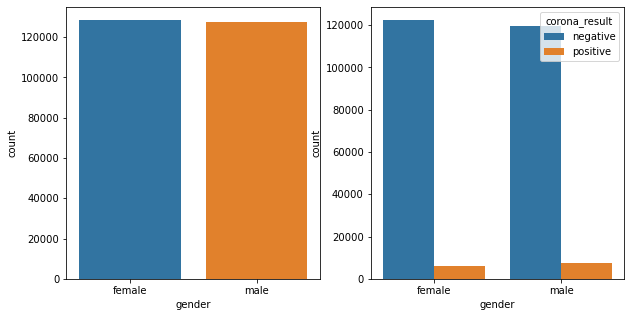

In [730]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
sns.countplot(covid['gender'],ax=ax[0])
sns.countplot(covid['gender'],hue=covid.corona_result,ax=ax[1])
plt.show()

In [731]:
pd.crosstab(covid.corona_result,covid.gender)

gender         female    male
corona_result                
negative       122500  119851
positive         6041    7519

<AxesSubplot:xlabel='corona_result'>

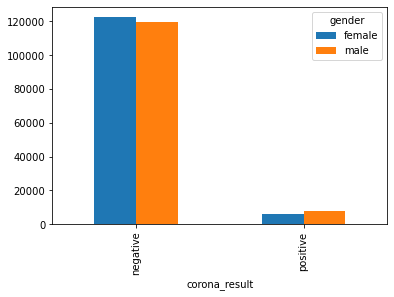

In [732]:
pd.crosstab(covid.corona_result,covid.gender).plot.bar()

In [733]:
a=covid.gender.value_counts()
keys=a.keys().to_list()
count=a.to_list()

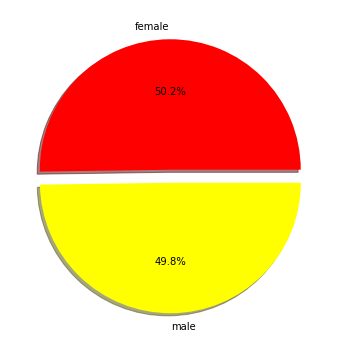

In [734]:
plt.figure(figsize=(15,6))
plt.pie(count,labels=keys,autopct='%1.1f%%',shadow=True,explode=[0,0.1],colors=['red','yellow'])
plt.show()

#### cough

In [735]:
covid['cough'].value_counts()

0       216616
1        39054
None       241
Name: cough, dtype: int64

In [736]:
covid.drop(covid.index[covid['cough'] == 'None'], inplace = True)
covid['cough'].value_counts()

0    216616
1     39054
Name: cough, dtype: int64

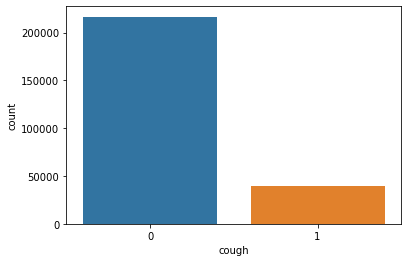

In [737]:
sns.countplot(covid.cough)
plt.show()

In [738]:
pd.crosstab(covid.corona_result,covid.cough)

cough               0      1
corona_result               
negative       209148  32988
positive         7468   6066

<AxesSubplot:xlabel='corona_result'>

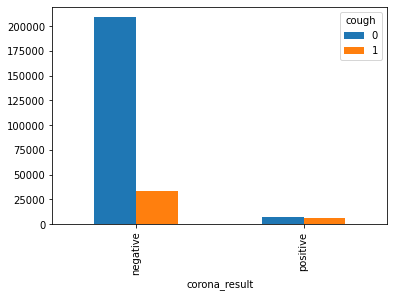

In [739]:
pd.crosstab(covid.corona_result,covid.cough).plot.bar()

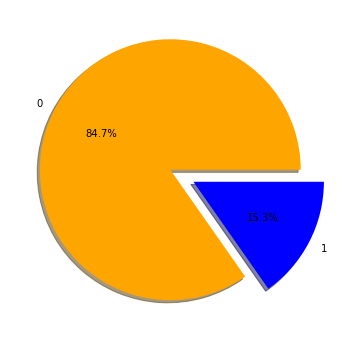

In [740]:
a=covid.cough.value_counts()
keys=a.keys().to_list()
count=a.to_list()
plt.figure(figsize=(15,6))
plt.pie(count,labels=keys,autopct='%1.1f%%',shadow=True,explode=[0,0.2],colors=['orange','blue'])
plt.show()

#### fever

In [741]:
covid['fever'].value_counts()

0       235814
1        19854
None         2
Name: fever, dtype: int64

In [742]:
covid.drop(covid.index[covid['fever'] == 'None'], inplace = True)
covid['fever'].value_counts()

0    235814
1     19854
Name: fever, dtype: int64

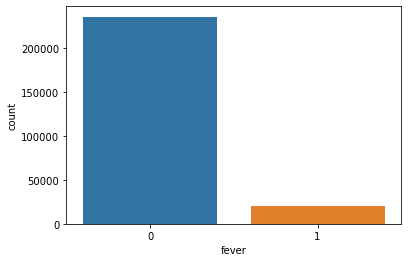

In [743]:
sns.countplot(covid.fever)
plt.show()

In [744]:
pd.crosstab(covid.corona_result,covid.fever)

fever               0      1
corona_result               
negative       227322  14814
positive         8492   5040

<AxesSubplot:xlabel='corona_result'>

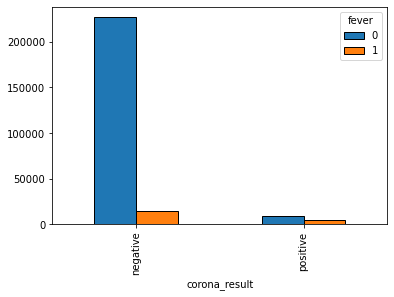

In [745]:
pd.crosstab(covid.corona_result,covid.fever).plot.bar(edgecolor='black')

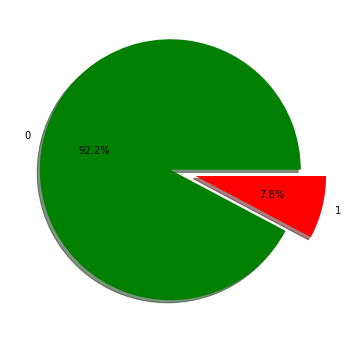

In [746]:
a=covid.fever.value_counts()
keys=a.keys().to_list()
count=a.to_list()
plt.figure(figsize=(15,6))
plt.pie(count,labels=keys,autopct='%1.1f%%',shadow=True,explode=[0,0.2],colors=['green','red'])
plt.show()

#### sore_throat

In [747]:
covid['sore_throat'].value_counts()

0    254172
1      1496
Name: sore_throat, dtype: int64

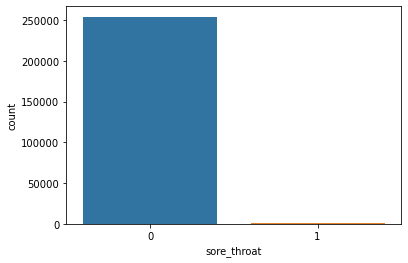

In [748]:
sns.countplot(covid.sore_throat)
plt.show()

In [749]:
pd.crosstab(covid.corona_result,covid.sore_throat)

sore_throat         0     1
corona_result              
negative       241999   137
positive        12173  1359

<AxesSubplot:xlabel='corona_result'>

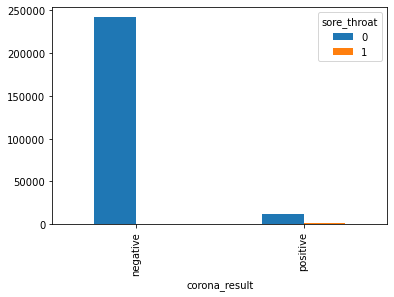

In [750]:
pd.crosstab(covid.corona_result,covid.sore_throat).plot.bar()

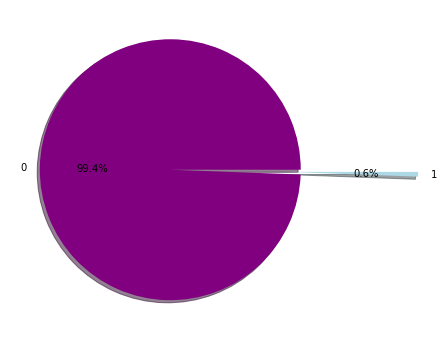

In [751]:
a=covid.sore_throat.value_counts()
keys=a.keys().to_list()
count=a.to_list()
plt.figure(figsize=(15,6))
plt.pie(count,labels=keys,autopct='%1.1f%%',shadow=True,explode=[0,0.9],colors=['purple','lightblue'])
plt.show()

#### shortness_of_breath

In [752]:
covid['shortness_of_breath'].value_counts()

0    254590
1      1078
Name: shortness_of_breath, dtype: int64

In [753]:
pd.crosstab(covid.corona_result,covid.shortness_of_breath)

shortness_of_breath       0    1
corona_result                   
negative             242037   99
positive              12553  979

<AxesSubplot:xlabel='corona_result'>

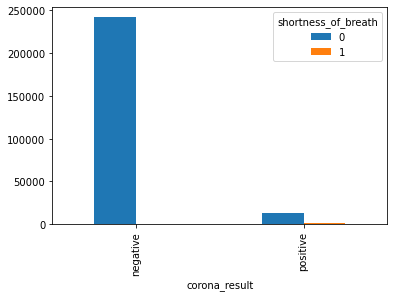

In [754]:
pd.crosstab(covid.corona_result,covid.shortness_of_breath).plot.bar()

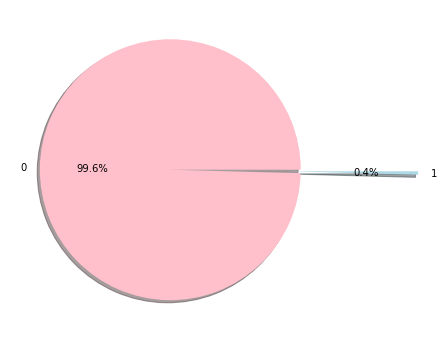

In [755]:
a=covid.shortness_of_breath.value_counts()
keys=a.keys().to_list()
count=a.to_list()
plt.figure(figsize=(15,6))
plt.pie(count,labels=keys,autopct='%1.1f%%',shadow=True,explode=[0,0.9],colors=['pink','lightblue'])
plt.show()

#### headache

In [756]:
covid['head_ache'].value_counts()

0    253565
1      2103
Name: head_ache, dtype: int64

In [757]:
pd.crosstab(covid.corona_result,covid.head_ache)

head_ache           0     1
corona_result              
negative       242038    98
positive        11527  2005

<AxesSubplot:xlabel='corona_result'>

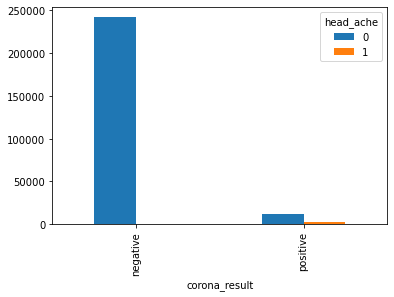

In [758]:
pd.crosstab(covid.corona_result,covid.head_ache).plot.bar()

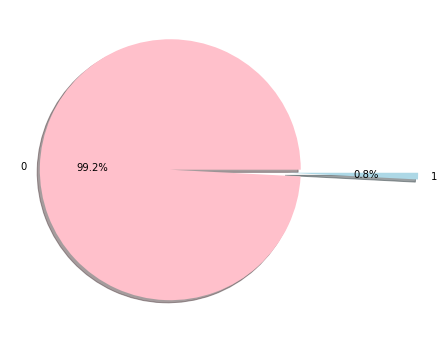

In [759]:
a=covid.head_ache.value_counts()
keys=a.keys().to_list()
count=a.to_list()
plt.figure(figsize=(15,6))
plt.pie(count,labels=keys,autopct='%1.1f%%',shadow=True,explode=[0,0.9],colors=['pink','lightblue'])
plt.show()

#### age

In [760]:
covid['age_60_and_above'].value_counts()

None    119374
No      112593
Yes      23701
Name: age_60_and_above, dtype: int64

In [761]:
#We are combining the None and NO categories
covid['age_60_and_above']=covid.get('age_60_and_above').replace('None','No')

In [762]:
covid['age_60_and_above'].value_counts()

No     231967
Yes     23701
Name: age_60_and_above, dtype: int64

In [763]:
pd.crosstab(covid.corona_result,covid.age_60_and_above)

age_60_and_above      No    Yes
corona_result                  
negative          220488  21648
positive           11479   2053

<AxesSubplot:xlabel='corona_result'>

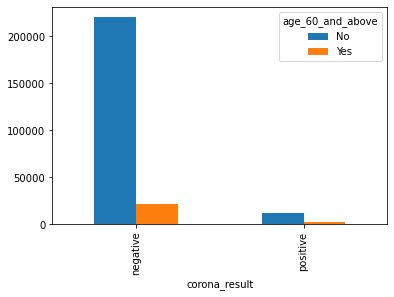

In [764]:
pd.crosstab(covid.corona_result,covid.age_60_and_above).plot.bar()

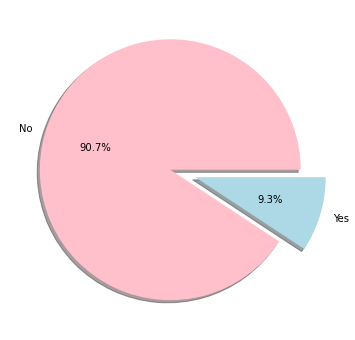

In [765]:
a=covid.age_60_and_above.value_counts()
keys=a.keys().to_list()
count=a.to_list()
plt.figure(figsize=(15,6))
plt.pie(count,labels=keys,autopct='%1.1f%%',shadow=True,explode=[0,0.2],colors=['pink','lightblue'])
plt.show()

#### test_indication

In [766]:
covid.test_indication.value_counts()

Other                     222766
Abroad                     23309
Contact with confirmed      9593
Name: test_indication, dtype: int64

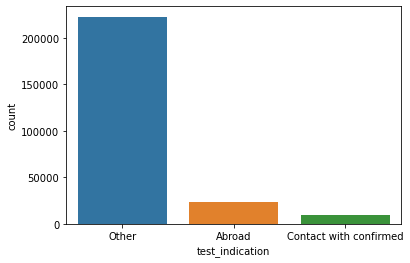

In [767]:
sns.countplot(covid.test_indication)
plt.show()

In [768]:
pd.crosstab(covid.corona_result,covid.test_indication)

test_indication  Abroad  Contact with confirmed   Other
corona_result                                          
negative          21878                    2758  217500
positive           1431                    6835    5266

<AxesSubplot:xlabel='corona_result'>

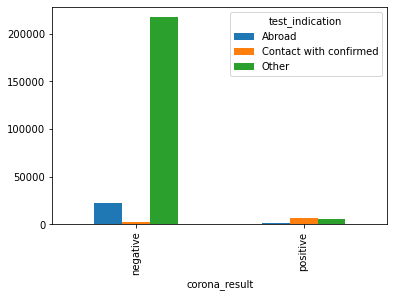

In [769]:
pd.crosstab(covid.corona_result,covid.test_indication).plot.bar()

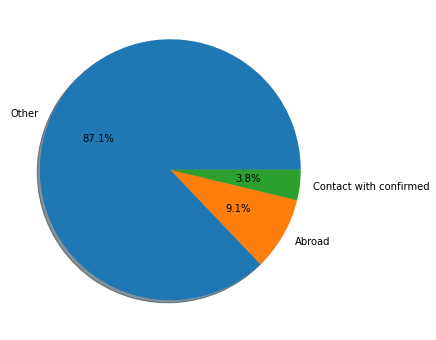

In [770]:
a=covid.test_indication.value_counts()
keys=a.keys().to_list()
count=a.to_list()
plt.figure(figsize=(15,6))
plt.pie(count,labels=keys,autopct='%1.1f%%',shadow=True)
plt.show()

### CHI SQUARE TEST

In [771]:
from scipy.stats import chi2_contingency

categorical=covid.select_dtypes(object)
for i in categorical:
    if i != 'corona_result':
        a=pd.crosstab(covid['corona_result'],covid[i])
        b=chi2_contingency(a)
        print(f'p value of {i} is: ',b[1])
        if b[1]<0.05:
            print(f'{i} is a good predictor')
        else:
            print(f'{i} is a bad predictor')

p value of cough is:  0.0
cough is a good predictor
p value of fever is:  0.0
fever is a good predictor
p value of sore_throat is:  0.0
sore_throat is a good predictor
p value of shortness_of_breath is:  0.0
shortness_of_breath is a good predictor
p value of head_ache is:  0.0
head_ache is a good predictor
p value of age_60_and_above is:  1.6355366010111076e-130
age_60_and_above is a good predictor
p value of gender is:  2.891323504799028e-42
gender is a good predictor
p value of test_indication is:  0.0
test_indication is a good predictor
p value of month is:  0.0
month is a good predictor


## Encoding

In [772]:
covid['gender'] = covid['gender'].map({'male': 1, 'female': 0})
covid['gender'].value_counts()

0    128413
1    127255
Name: gender, dtype: int64

In [773]:
covid['corona_result'] = covid['corona_result'].map({'positive': 1, 'negative': 0})
covid['corona_result'].value_counts()

0    242136
1     13532
Name: corona_result, dtype: int64

In [774]:
covid['age_60_and_above'] = covid['age_60_and_above'].map({'Yes': 1, 'No': 0})
covid['age_60_and_above'].value_counts()

0    231967
1     23701
Name: age_60_and_above, dtype: int64

In [775]:
covid['month'] = covid['month'].map({'April': 1, 'March': 0})
covid.month.value_counts()

1    203854
0     51814
Name: month, dtype: int64

In [776]:
covid.dtypes

test_date              datetime64[ns]
cough                          object
fever                          object
sore_throat                    object
shortness_of_breath            object
head_ache                      object
corona_result                   int64
age_60_and_above                int64
gender                          int64
test_indication                object
month                           int64
day                             int64
dtype: object

In [777]:
covid.fever=covid.fever.astype('int64')
covid.cough=covid.cough.astype('int64')
covid.sore_throat=covid.sore_throat.astype('int64')
covid.shortness_of_breath=covid.shortness_of_breath.astype('int64')
covid.head_ache=covid.head_ache.astype('int64')
covid.month=covid.month.astype('int64')

In [778]:
covid.dtypes

test_date              datetime64[ns]
cough                           int64
fever                           int64
sore_throat                     int64
shortness_of_breath             int64
head_ache                       int64
corona_result                   int64
age_60_and_above                int64
gender                          int64
test_indication                object
month                           int64
day                             int64
dtype: object

## Balancing the data

In [779]:
covid.corona_result.value_counts()

0    242136
1     13532
Name: corona_result, dtype: int64

In [780]:
Positive=covid[covid.corona_result==1]
Negative=covid[covid.corona_result==0]

In [781]:
from sklearn.utils import resample
positive_resampled=resample(Positive,replace=True,n_samples=len(Negative),random_state=100)
positive_resampled.shape

(242136, 12)

In [782]:
data=pd.concat([positive_resampled,Negative])
data.head()

test_date  cough  fever  sore_throat  shortness_of_breath  head_ache  \
168270 2020-04-07      0      0            0                    0          1   
185943 2020-04-04      0      0            0                    0          1   
201963 2020-04-02      1      1            0                    0          0   
249285 2020-03-25      0      0            0                    0          0   
4738   2020-04-30      0      0            0                    0          0   

        corona_result  age_60_and_above  gender         test_indication  \
168270              1                 0       1  Contact with confirmed   
185943              1                 0       1  Contact with confirmed   
201963              1                 0       1                  Abroad   
249285              1                 1       0                   Other   
4738                1                 0       1  Contact with confirmed   

        month  day  
168270      1    7  
185943      1    4  
201963      1    2  
249285      0   25  
4738        1   30

In [783]:
data.shape

(484272, 12)

In [784]:
data.corona_result.value_counts()

1    242136
0    242136
Name: corona_result, dtype: int64

## MODEL

In [785]:
x=data.drop(['test_date','corona_result','test_indication','day'], axis=1)
y=data['corona_result']
print(x.shape)
print(y.shape)

(484272, 8)
(484272,)


In [786]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [787]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(387417, 8)
(96855, 8)
(387417,)
(96855,)


## Decision Tree

In [788]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
DT=tree.fit(X_train,y_train)

In [789]:
DecisionTreeClassifierScore = tree.score(X_test,y_test)
print("Accuracy obtained by Decision Tree Classifier model:",DecisionTreeClassifierScore*100)

Accuracy obtained by Decision Tree Classifier model: 74.2450054204739


In [790]:
ypred_dt=DT.predict(X_test)
cm_tree=pd.crosstab(y_test,ypred_dt,rownames=['Actual'],colnames=['Predicted'],margins=True)
cm_tree

Predicted      0      1    All
Actual                        
0          41016   7388  48404
1          17557  30894  48451
All        58573  38282  96855

In [791]:
print(classification_report(y_test,ypred_dt))

              precision    recall  f1-score   support

           0       0.70      0.85      0.77     48404
           1       0.81      0.64      0.71     48451

    accuracy                           0.74     96855
   macro avg       0.75      0.74      0.74     96855
weighted avg       0.75      0.74      0.74     96855



In [792]:
accuracy_score(y_test,ypred_dt)

0.7424500542047391

In [793]:
fpr,tpr,thresholds=roc_curve(y_test,ypred_dt)
print(fpr)
print(tpr)
print(thresholds)

[0.         0.15263201 1.        ]
[0.        0.6376339 1.       ]
[2 1 0]


In [794]:
auc=auc(fpr,tpr)
auc

0.7425009421410032

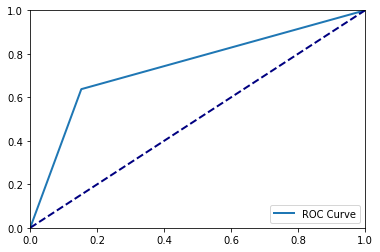

In [795]:
plt.figure()
lw=2
plt.plot(fpr,tpr,lw=lw,label='ROC Curve')
plt.plot([0,1],[0,1],color='navy',lw=lw,linestyle='--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.legend(loc='lower right')
plt.show()

## Logistic Regression

In [796]:
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

LogisticRegression()

In [797]:
y_pred = LogReg.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [798]:
confusion_matrix=pd.crosstab(y_test,y_pred,rownames=['Actual'],colnames=['Predicted'],margins=True)
confusion_matrix

Predicted      0      1    All
Actual                        
0          42586   5818  48404
1          19864  28587  48451
All        62450  34405  96855

In [802]:
accuracy_score(y_test,y_pred)

0.7348407413143359

In [799]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.88      0.77     48404
           1       0.83      0.59      0.69     48451

    accuracy                           0.73     96855
   macro avg       0.76      0.73      0.73     96855
weighted avg       0.76      0.73      0.73     96855



In [803]:
data.columns

Index(['test_date', 'cough', 'fever', 'sore_throat', 'shortness_of_breath',
       'head_ache', 'corona_result', 'age_60_and_above', 'gender',
       'test_indication', 'month', 'day'],
      dtype='object')

In [807]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

mylogit=smf.glm(formula='corona_result~cough+fever+sore_throat+shortness_of_breath+head_ache\
                  +gender+age_60_and_above+month',data=data,family=sm.families.Binomial())
res=mylogit.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:          corona_result   No. Observations:               484272
Model:                            GLM   Df Residuals:                   484263
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -2.5784e+05
Date:                Tue, 28 Sep 2021   Deviance:                   5.1568e+05
Time:                        00:21:22   Pearson chi2:                 3.88e+07
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -0.6795    